<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/base_de_dados_usando_oversampling_e_undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive

In [3]:
credito2022=pd.read_csv('/content/credit_risk_dataset.csv')

In [9]:
credito2022

,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1
...,...,...,...,...
32576,57,53000,5800,0
32577,54,120000,17625,0
32578,65,76000,35000,1
32579,56,150000,15000,0


In [10]:

credito2022 = credito2022.drop("person_emp_length", axis=1)
credito2022 = credito2022.drop("loan_intent", axis=1)
credito2022 = credito2022.drop("loan_grade", axis=1)
credito2022 = credito2022.drop("loan_int_rate", axis=1)
credito2022 = credito2022.drop("loan_percent_income", axis=1)
credito2022 = credito2022.drop("cb_person_default_on_file", axis=1)
credito2022 = credito2022.drop("cb_person_cred_hist_length", axis=1)

KeyError: ignored

In [11]:
credito2022.to_csv("credito2022.csv", index=False)

In [12]:
credito2022


,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1
...,...,...,...,...
32576,57,53000,5800,0
32577,54,120000,17625,0
32578,65,76000,35000,1
32579,56,150000,15000,0


In [13]:
credito2022.describe()

,person_age,person_income,loan_amnt,loan_status
count,32581.000000,3.258100e+04,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,0.218164
std,6.348078,6.198312e+04,6322.086646,0.413006
min,20.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000
max,144.000000,6.000000e+06,35000.000000,1.000000


In [14]:
# Handle missing or null values
credito2022 = credito2022.fillna(0)

In [15]:
# Define a function to check for consistent age values
def check_age(person_age):
  if person_age < 0 or person_age > 120:
    return False
  return True

In [16]:
# Use the apply() function to filter out inconsistent ages
credito2022 = credito2022[credito2022["person_age"].apply(check_age)]

In [17]:
credito2022.describe()

,person_age,person_income,loan_amnt,loan_status
count,32576.000000,3.257600e+04,32576.000000,32576.000000
mean,27.718044,6.588214e+04,9589.117755,0.218197
std,6.204990,5.253499e+04,6321.886846,0.413029
min,20.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000
max,94.000000,2.039784e+06,35000.000000,1.000000


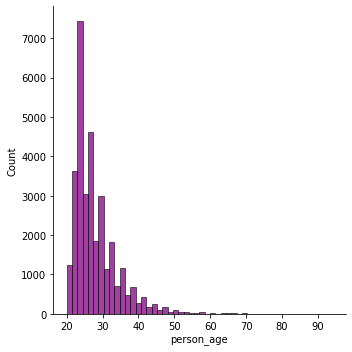

In [18]:
# Create the plot for person_age (numerical data)

x = credito2022["person_age"]
sns.displot(x, kde=False, bins=50, color="purple")


plt.show()

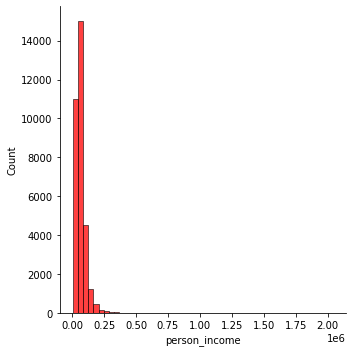

In [19]:
# Create the plot for person_income (numerical data)

y = credito2022["person_income"]
sns.displot(y, kde=False, bins=50, color="red")


plt.show()

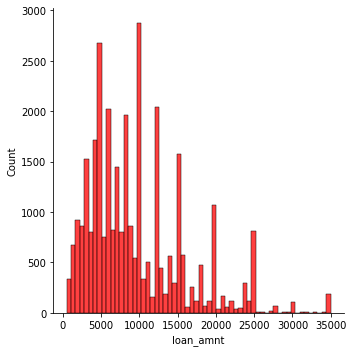

In [20]:
# Create the plot for loan amount (numerical data)

z = credito2022["loan_amnt"]
sns.displot(z, kde=False, bins=60, color="red")


plt.show()

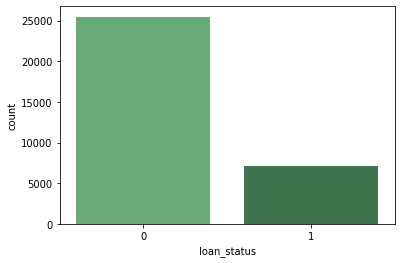

In [21]:
# Create the plot for loan status (categorical data)
sns.countplot(x="loan_status", data=credito2022, palette="Greens_d")

plt.show()

**Divisão entre classe e previsores**

In [24]:
X_credito=credito2022.iloc[:,0:3].values
Y_credito=credito2022.iloc[:,3].values

In [25]:
X_credito

array([[    22,  59000,  35000],
       [    21,   9600,   1000],
       [    25,   9600,   5500],
       ...,
       [    65,  76000,  35000],
       [    56, 150000,  15000],
       [    66,  42000,   6475]])

In [26]:
Y_credito

array([1, 0, 1, ..., 1, 0, 0])

**Padronização dos dados**

In [27]:
from sklearn import preprocessing

In [28]:
scaler = preprocessing.StandardScaler()
X_credito = scaler.fit_transform(X_credito)

In [29]:
X_credito

array([[-0.92153769, -0.13100311,  4.01957088],
       [-1.08270079, -1.07134327, -1.35865285],
       [-0.43804839, -1.07134327, -0.64682912],
       ...,
       [ 6.00847561,  0.19259573,  4.01957088],
       [ 4.55800771,  1.60120243,  0.85590986],
       [ 6.16963871, -0.45460195, -0.49260065]])

**Usando o oversampling e undersampling**

In [105]:
# Create a TomekLinks object
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')

In [106]:
# Fit and transform the dataset
X_resampled, Y_resampled = tl.fit_resample(X_credito, Y_credito)

In [107]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled, Y_resampled, test_size=0.3)

In [108]:
model.fit(X_train_under, y_train_under)

GaussianNB()

In [109]:
predictions = model.predict(X_test_under)

In [110]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test_under, predictions)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [111]:
# usando SMOTE

from imblearn.over_sampling import SMOTE

# define the oversampling method
oversample = SMOTE()

In [112]:
# Fit and transform the dataset
X_over, Y_over = oversample.fit_resample(X_credito, Y_credito)

In [113]:
from sklearn.model_selection import train_test_split

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, Y_over, test_size=0.3)

In [114]:
model.fit(X_train_over, y_train_over)

GaussianNB()

In [115]:
predictions2 = model.predict(X_test_over)

In [116]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test_over, predictions2)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


**Base de treinamento e de teste**

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_credito, Y_credito, test_size=0.3)

In [96]:
#Usando Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

**Salvando os dados**

In [97]:
import pickle
# Save the object to a file
with open('credit.pickle', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)



**Técnicas Estatísticas**

In [98]:
# Naives Bayes

with open('credit.pickle', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [99]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [100]:
# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [101]:
predictions = model.predict(X_test)

In [102]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

**Acurácia**

In [103]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


**Confusion Matrix**

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

print(confusion_matrix)


[[7522  115]
 [2001  135]]


In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7692
           1       0.54      0.06      0.12      2081

    accuracy                           0.79      9773
   macro avg       0.67      0.52      0.50      9773
weighted avg       0.74      0.79      0.72      9773

